In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Final Data\Moong\Moong_Rajasthan.csv")
df = df.drop(columns=['latitude','longitude','DistrictName', 'year'])
# df = df.sample(frac=1).reset_index(drop=True)
#df = df.drop(columns=['DistrictName','latitude','longitude','year','year_mask'])

In [3]:
df = df.rename(columns={'Yield(tonnes/hectare)':'Yield(Tonnes/Hectare)'},inplace=False)

In [4]:
df = df.drop(columns=['stl2_7','stl2_8', 'stl2_9', 'stl2_10', 'stl3_7', 'stl3_8', 'stl3_9', 'stl3_10'])

In [5]:
df.columns

Index(['stl1_7', 'stl1_8', 'stl1_9', 'stl1_10', 'stl4_7', 'stl4_8', 'stl4_9',
       'stl4_10', 'swvl1_7', 'swvl1_8', 'swvl1_9', 'swvl1_10', 'swvl2_7',
       'swvl2_8', 'swvl2_9', 'swvl2_10', 'swvl3_7', 'swvl3_8', 'swvl3_9',
       'swvl3_10', 'swvl4_9', 'swvl4_10', 'swvl4_7', 'swvl4_8', 'ssr_9',
       'ssr_10', 'ssr_7', 'ssr_8', 'u10_7', 'u10_8', 'u10_9', 'u10_10',
       'v10_7', 'v10_8', 'v10_9', 'v10_10', 'tmax_7', 'tmax_8', 'tmax_9',
       'tmax_10', 'tmin_7', 'tmin_8', 'tmin_9', 'tmin_10', 'rain_7', 'rain_8',
       'rain_9', 'rain_10', 'countrain_7', 'countrain_8', 'countrain_9',
       'countrain_10', 'rh_7', 'rh_8', 'rh_9', 'rh_10',
       'Yield(Tonnes/Hectare)'],
      dtype='object')

In [6]:
# df['stl1'] = (df['stl1_1'] + df['stl1_2'])/2
# df['stl2'] = (df['stl2_1'] + df['stl2_2'])/2
# df['stl3'] = (df['stl3_1'] + df['stl3_2'])/2
# df['stl4'] = (df['stl4_1'] + df['stl4_2'])/2
# df['swvl1'] = (df['swvl1_1'] + df['swvl1_2'])/2
# df['swvl2'] = (df['swvl2_1'] + df['swvl2_2'])/2
# df['swvl3'] = (df['swvl3_1'] + df['swvl3_2'])/2
# df['swvl4'] = (df['swvl4_1'] + df['swvl4_2'])/2
# df['ssr'] = (df['ssr_1'] + df['ssr_2'])/2
# df['rain'] = (df['rain_1'] + df['rain_2'])/2
# df['tmax'] = (df['tmax_1'] + df['tmax_2'])/2
# df['tmin'] = (df['tmin_1'] + df['tmin_2'])/2
# df['countrain'] = df['countrain_1'] + df['countrain_2']
# df['u10'] = (df['u10_3']+df['u10_4'])/2
# df['v10'] = (df['v10_3']+df['v10_4'])/2
# df['rh'] = (df['rh_3']+df['rh_4'])/2

In [7]:
# df = df.drop(columns=['stl1_1','stl1_2','stl2_1','stl2_2','stl3_1','stl3_2','stl4_1','stl4_2','swvl1_1','swvl1_2','swvl2_1','swvl2_2','swvl3_1','swvl3_2','swvl4_1','swvl4_2','ssr_1','ssr_2','rain_1','rain_2','tmax_1','tmax_2','tmin_1','tmin_2','countrain_1','countrain_2','u10_3','u10_4','v10_3','v10_4','rh_3','rh_4'],axis=1)

In [8]:
df.shape

(858, 57)

In [9]:
df.columns

Index(['stl1_7', 'stl1_8', 'stl1_9', 'stl1_10', 'stl4_7', 'stl4_8', 'stl4_9',
       'stl4_10', 'swvl1_7', 'swvl1_8', 'swvl1_9', 'swvl1_10', 'swvl2_7',
       'swvl2_8', 'swvl2_9', 'swvl2_10', 'swvl3_7', 'swvl3_8', 'swvl3_9',
       'swvl3_10', 'swvl4_9', 'swvl4_10', 'swvl4_7', 'swvl4_8', 'ssr_9',
       'ssr_10', 'ssr_7', 'ssr_8', 'u10_7', 'u10_8', 'u10_9', 'u10_10',
       'v10_7', 'v10_8', 'v10_9', 'v10_10', 'tmax_7', 'tmax_8', 'tmax_9',
       'tmax_10', 'tmin_7', 'tmin_8', 'tmin_9', 'tmin_10', 'rain_7', 'rain_8',
       'rain_9', 'rain_10', 'countrain_7', 'countrain_8', 'countrain_9',
       'countrain_10', 'rh_7', 'rh_8', 'rh_9', 'rh_10',
       'Yield(Tonnes/Hectare)'],
      dtype='object')

In [10]:
df = df.dropna(subset=['Yield(Tonnes/Hectare)'])

In [11]:
df.shape

(716, 57)

In [12]:
df['Yield(Tonnes/Hectare)'].skew()

0.20219990257318507

C:\Users\Kanishk Goyal\AppData\Local\Temp\ipykernel_36164\994257175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield(Tonnes/Hectare)'],color='green')


<Axes: xlabel='Yield(Tonnes/Hectare)', ylabel='Density'>

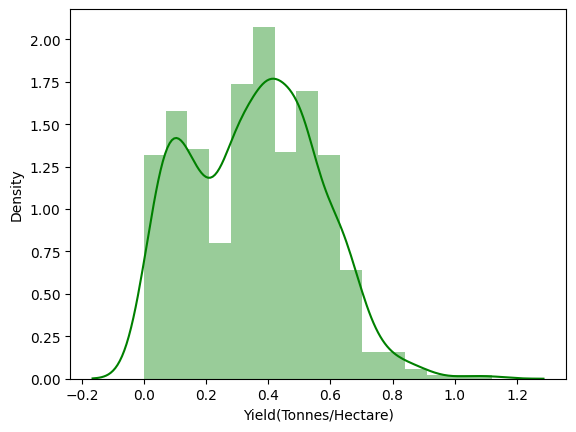

In [13]:
sns.distplot(df['Yield(Tonnes/Hectare)'],color='green')

In [14]:
df['Yield(Tonnes/Hectare)']

1      0.10
2      0.10
3      0.17
4      0.30
5      0.07
       ... 
850    0.53
851    0.58
852    0.52
853    0.44
854    0.49
Name: Yield(Tonnes/Hectare), Length: 716, dtype: float64

In [15]:
Q1 = df['Yield(Tonnes/Hectare)'].quantile(0.25)
Q3 = df['Yield(Tonnes/Hectare)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Yield_no_outliers'] = np.where((df['Yield(Tonnes/Hectare)'] < lower_bound) | (df['Yield(Tonnes/Hectare)'] > upper_bound), np.nan, df['Yield(Tonnes/Hectare)'])

num_points_after_handling_outliers = df['Yield_no_outliers'].count()
print("Number of points in the final DataFrame after handling outliers:", num_points_after_handling_outliers)

Number of points in the final DataFrame after handling outliers: 714


In [16]:
df = df.dropna(subset=['Yield_no_outliers'])
df = df.drop(columns=['Yield(Tonnes/Hectare)'])

In [17]:
df.rename(columns={'Yield_no_outliers': 'Yield(Tonnes/Hectare)'}, inplace=True)

In [18]:
df['Yield(Tonnes/Hectare)'].skew()

0.11092190609612522

C:\Users\Kanishk Goyal\AppData\Local\Temp\ipykernel_36164\1820324139.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield(Tonnes/Hectare)'])


<Axes: xlabel='Yield(Tonnes/Hectare)', ylabel='Density'>

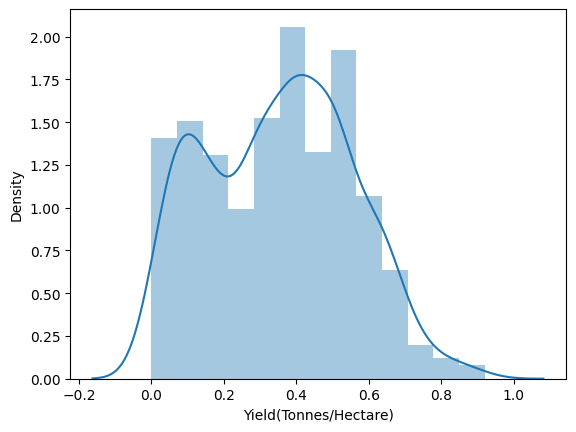

In [19]:
sns.distplot(df['Yield(Tonnes/Hectare)'])

In [20]:
df.head(10)

,stl1_7,stl1_8,stl1_9,stl1_10,stl4_7,stl4_8,stl4_9,stl4_10,swvl1_7,swvl1_8,...,rain_10,countrain_7,countrain_8,countrain_9,countrain_10,rh_7,rh_8,rh_9,rh_10,Yield(Tonnes/Hectare)
1,28.715894,27.934075,27.886808,26.719487,30.691108,30.098458,29.533646,29.060003,0.448653,0.470749,...,1.209279,15,8,13,4,78.631396,83.732681,81.081568,68.779209,0.10
2,27.673692,27.272024,28.532375,27.118718,29.991636,29.210177,28.743452,28.657568,0.449446,0.424066,...,0.683331,11,3,6,3,81.846332,79.540942,72.348377,58.635117,0.10
3,27.444955,27.529946,27.860018,29.356139,30.730397,29.855453,29.132670,29.021526,0.455492,0.438404,...,0.003109,11,9,1,0,82.638135,80.026240,68.375302,40.497077,0.17
4,27.078149,26.974522,28.769636,28.729542,30.156772,29.307877,28.705293,28.819030,0.478109,0.462475,...,0.157901,16,8,1,1,85.535571,84.341102,67.093749,44.661556,0.30
5,28.802431,26.753014,27.562441,29.161955,31.343358,30.495508,29.473909,29.146234,0.396262,0.475038,...,0.000000,3,10,7,0,72.532962,83.932229,71.431337,35.129022,0.07
6,27.982885,26.926782,26.934356,26.592432,31.134913,30.125952,29.161421,28.544317,0.474659,0.475525,...,0.000000,15,17,12,0,84.850674,85.862229,81.413639,49.464476,0.62
7,28.939689,25.845493,29.026135,27.448567,30.815785,29.947821,28.991104,28.902742,0.416898,0.475040,...,0.639849,9,20,4,2,75.016113,88.935876,71.229912,50.005863,0.27
8,28.533731,27.154306,27.857930,26.709025,30.903722,30.157549,29.480239,28.853525,0.422054,0.458141,...,0.000000,10,6,15,0,76.715197,81.977939,80.676423,51.359493,0.15
9,27.687214,25.723386,27.786078,28.875734,30.612286,29.541955,28.570000,28.464024,0.471446,0.480796,...,0.450420,22,22,9,1,84.864586,89.194897,80.581121,45.013604,0.36
10,28.038419,27.278570,27.624600,26.374670,31.131490,30.216126,29.383747,28.767981,0.466081,0.470091,...,0.000000,12,19,14,0,84.117569,85.490263,81.949579,46.223540,0.41


In [21]:
df.shape

(714, 57)

In [22]:
# cat_cols = ['DistrictName', 'year']
# # Label encode categorical columns
# encoder = LabelEncoder()
# df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

In [23]:
df.head()

,stl1_7,stl1_8,stl1_9,stl1_10,stl4_7,stl4_8,stl4_9,stl4_10,swvl1_7,swvl1_8,...,rain_10,countrain_7,countrain_8,countrain_9,countrain_10,rh_7,rh_8,rh_9,rh_10,Yield(Tonnes/Hectare)
1,28.715894,27.934075,27.886808,26.719487,30.691108,30.098458,29.533646,29.060003,0.448653,0.470749,...,1.209279,15,8,13,4,78.631396,83.732681,81.081568,68.779209,0.10
2,27.673692,27.272024,28.532375,27.118718,29.991636,29.210177,28.743452,28.657568,0.449446,0.424066,...,0.683331,11,3,6,3,81.846332,79.540942,72.348377,58.635117,0.10
3,27.444955,27.529946,27.860018,29.356139,30.730397,29.855453,29.132670,29.021526,0.455492,0.438404,...,0.003109,11,9,1,0,82.638135,80.026240,68.375302,40.497077,0.17
4,27.078149,26.974522,28.769636,28.729542,30.156772,29.307877,28.705293,28.819030,0.478109,0.462475,...,0.157901,16,8,1,1,85.535571,84.341102,67.093749,44.661556,0.30
5,28.802431,26.753014,27.562441,29.161955,31.343358,30.495508,29.473909,29.146234,0.396262,0.475038,...,0.000000,3,10,7,0,72.532962,83.932229,71.431337,35.129022,0.07


In [24]:
df.shape

(714, 57)

In [25]:
df.columns

Index(['stl1_7', 'stl1_8', 'stl1_9', 'stl1_10', 'stl4_7', 'stl4_8', 'stl4_9',
       'stl4_10', 'swvl1_7', 'swvl1_8', 'swvl1_9', 'swvl1_10', 'swvl2_7',
       'swvl2_8', 'swvl2_9', 'swvl2_10', 'swvl3_7', 'swvl3_8', 'swvl3_9',
       'swvl3_10', 'swvl4_9', 'swvl4_10', 'swvl4_7', 'swvl4_8', 'ssr_9',
       'ssr_10', 'ssr_7', 'ssr_8', 'u10_7', 'u10_8', 'u10_9', 'u10_10',
       'v10_7', 'v10_8', 'v10_9', 'v10_10', 'tmax_7', 'tmax_8', 'tmax_9',
       'tmax_10', 'tmin_7', 'tmin_8', 'tmin_9', 'tmin_10', 'rain_7', 'rain_8',
       'rain_9', 'rain_10', 'countrain_7', 'countrain_8', 'countrain_9',
       'countrain_10', 'rh_7', 'rh_8', 'rh_9', 'rh_10',
       'Yield(Tonnes/Hectare)'],
      dtype='object')

In [26]:
#df = df[['countrain_11', 'countrain_12', 'countrain_1','countrain_2', 'countrain_3', 'countrain_4', 'rain_11', 'rain_12','rain_1', 'rain_2', 'rain_3', 'rain_4','tmax_11', 'tmax_12', 'tmax_1','tmax_2', 'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2','tmin_3', 'tmin_4','Yield(Tonnes/Hectare)']]

In [27]:
#df = df.drop(columns=['countrain_11', 'countrain_12', 'countrain_1','countrain_2', 'countrain_3', 'countrain_4', 'rain_11', 'rain_12','rain_1', 'rain_2', 'rain_3', 'rain_4','tmax_11', 'tmax_12', 'tmax_1','tmax_2', 'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2','tmin_3', 'tmin_4'])

In [28]:
df.shape

(714, 57)

In [29]:
X = df.drop('Yield(Tonnes/Hectare)', axis=1)  # Features
y = df['Yield(Tonnes/Hectare)']  # Target variable

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# X = X.drop(columns=['stl2','stl3'],axis=1)

In [31]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold




# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "XGB Regressor": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
for name, model in models.items():

    mse_scores_test = []
    mse_scores_train = []
    r2_scores_test = []
    r2_scores_train = []
    # Create KFold object
    k = 10
    kfold = KFold(n_splits=k, shuffle=True)

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        mse_train = mean_squared_error(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        r2_train = r2_score(y_train, y_pred_train)
        mse_scores_test.append(mse_test)
        mse_scores_train.append(mse_train)
        r2_scores_test.append(r2_test)
        r2_scores_train.append(r2_train)

    average_mse_test = np.mean(mse_scores_test)
    average_mse_train = np.mean(mse_scores_train)
    average_r2_test = np.mean(r2_scores_test)
    average_r2_train = np.mean(r2_scores_train)  

    print(f'{name} - R^2 Score (Train) : {average_r2_train:.2f}, R^2 Score (Test): {average_r2_test:.2f}')
    print(r2_scores_test)


Linear Regression - R^2 Score (Train) : 0.58, R^2 Score (Test): 0.50
[0.3446619930019764, 0.41782091322465176, 0.5043386823531755, 0.6683698223556782, 0.4537336607541883, 0.4685401249900082, 0.530029932353327, 0.2750850208424678, 0.5736907814675742, 0.7151829204279065]
Ridge Regression - R^2 Score (Train) : 0.56, R^2 Score (Test): 0.48
[0.5818147727043306, 0.46597438944795033, 0.3357287452214375, 0.5175421392649473, 0.5347983675471519, 0.5574124387752183, 0.5082263295259313, 0.45306812921361206, 0.4473348737895462, 0.4460393098341572]


c:\Users\Kanishk Goyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.09562e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Kanishk Goyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.1051e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Kanishk Goyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.10262e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


XGB Regressor - R^2 Score (Train) : 1.00, R^2 Score (Test): 0.54
[0.5224302616691983, 0.5949276996704667, 0.6377752845229565, 0.5718421052322391, 0.46774168887356604, 0.6031009978882091, 0.42131603954162566, 0.6527560302371971, 0.5234148982662652, 0.4332760243800656]
Lasso Regression - R^2 Score (Train) : 0.19, R^2 Score (Test): 0.15
[0.2269155574340337, 0.287921971327471, 0.07279602395828921, 0.1058693859867913, 0.20681996724453322, 0.2067935782418744, 0.19236611643352375, 0.06351041089707254, -0.001142516541072558, 0.09371026422908746]
Decision Tree - R^2 Score (Train) : 1.00, R^2 Score (Test): 0.11
[0.4237452533298044, -0.2112017247536886, 0.3188604665451491, 0.020942548841801245, 0.30974381432012255, -0.6022844128819957, 0.10978693969540831, 0.38561742013836264, 0.25766360751350903, 0.08494779644879047]
Gradient Boosting - R^2 Score (Train) : 0.90, R^2 Score (Test): 0.55
[0.6024668855492764, 0.3612719081297233, 0.5496466253023653, 0.6413197608298933, 0.6742410027550669, 0.632559697

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# import pandas as pd

# # Assuming X_train is your DataFrame
# # X_train = pd.DataFrame(...)

# corr_matrix = X_train.corr()

# # Get the column names of the DataFrame
# columns = corr_matrix.columns

# # Create an empty list to keep track of columns to drop
# columns_to_drop = []
# # Create a dictionary to store highly correlated features
# highly_correlated_features = {}

# # Loop over the columns
# for i in range(len(columns)):
#     for j in range(0, len(columns)):  # Loop only over the upper triangle to avoid duplicate comparisons
#         # Access the cell of the DataFrame
#         if abs(corr_matrix.iloc[i, j]) > 0.90:
#             # Sort correlated features based on correlation coefficient
#             sorted_features = sorted([(corr_matrix.iloc[i, j], columns[j]), (corr_matrix.iloc[i, i], columns[i])],
#                                      key=lambda x: abs(x[0]), reverse=True)
#             # Add the column to drop
#             columns_to_drop.append(sorted_features[1][1])  # Add the one with lower correlation
#             # Update the dictionary with highly correlated features
#             if sorted_features[0][1] in highly_correlated_features:
#                 highly_correlated_features[sorted_features[0][1]].append(sorted_features[1][1])
#             else:
#                 highly_correlated_features[sorted_features[0][1]] = [sorted_features[1][1]]

# print(len(columns_to_drop))


In [34]:
# import seaborn as sns

# corr_matrix = X_train.corr()

# # Get the column names of the DataFrame
# columns = corr_matrix.columns

# # Define a function to sort correlations in descending order (absolute value)
# def sort_correlations(series):
#   # Take the absolute value of the series
#   abs_series = series.abs()
#   # Sort the absolute values in descending order
#   return abs_series.sort_values(ascending=False)

# # Sort each column of the correlation matrix
# sorted_corr_matrix = corr_matrix.apply(sort_correlations)

# # Create an empty list to keep track of columns to drop
# columns_to_drop = []
# # Create a dictionary to store highly correlated features
# highly_correlated_features = {}

# # Loop over the sorted correlation matrix
# for i in range(len(sorted_corr_matrix.columns)):
#   # Skip the diagonal (correlation with self)
#   if i == sorted_corr_matrix.columns[i]:
#     continue
#   # Get the current column and sorted correlations
#   current_column = sorted_corr_matrix.columns[i]
#   sorted_correlations = sorted_corr_matrix.loc[current_column]
  
#   # Identify highly correlated features (> 0.90) excluding the current column
#   highly_correlated_features[current_column] = list(sorted_correlations[sorted_correlations > 0.90].index.difference([current_column]))

#   # Update columns to drop based on correlations with the current column
#   columns_to_drop.extend(highly_correlated_features[current_column])

# # Remove duplicates from columns to drop
# columns_to_drop = list(set(columns_to_drop))

# print(len(columns_to_drop))

In [35]:
import seaborn as sns
corr_matrix = X_train.corr()

# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []
# Create a dictionary to store highly correlated features
highly_correlated_features = {}

# Loop over the columns
for i in range(len(columns)):
    for j in range(0, len(columns)):
        # Access the cell of the DataFrame
        if i != j and corr_matrix.iloc[i, j] > 0.90:
            # Add the column to drop
            columns_to_drop.append(columns[j])
            # Update the dictionary with highly correlated features
            if columns[i] in highly_correlated_features:
                highly_correlated_features[columns[i]].append((columns[j], corr_matrix.iloc[i, j].round(4)))
            else:
                highly_correlated_features[columns[i]] = [(columns[j], corr_matrix.iloc[i, j].round(4))]


print(len(columns_to_drop))

52


In [36]:
print(columns_to_drop)

['stl4_10', 'stl4_9', 'stl4_8', 'stl4_10', 'stl1_9', 'stl4_9', 'swvl2_7', 'swvl2_8', 'swvl2_9', 'swvl2_10', 'swvl1_7', 'swvl1_8', 'swvl3_8', 'swvl3_9', 'swvl3_10', 'swvl1_9', 'swvl3_9', 'swvl3_10', 'swvl1_10', 'swvl3_10', 'swvl2_8', 'swvl3_9', 'swvl3_10', 'swvl4_9', 'swvl4_10', 'swvl2_8', 'swvl2_9', 'swvl3_8', 'swvl3_10', 'swvl2_8', 'swvl2_9', 'swvl2_10', 'swvl3_8', 'swvl3_9', 'swvl4_10', 'swvl3_8', 'swvl4_10', 'swvl4_7', 'swvl4_8', 'swvl3_8', 'swvl3_10', 'swvl4_9', 'swvl4_7', 'swvl4_8', 'swvl4_9', 'swvl4_10', 'swvl4_8', 'swvl4_9', 'swvl4_10', 'swvl4_7', 'tmin_7', 'tmax_7']


In [37]:
print("Highly correlated features:")
for key, value in highly_correlated_features.items():
    print(key, ":", value)

Highly correlated features:
stl1_9 : [('stl4_10', 0.9156)]
stl4_8 : [('stl4_9', 0.9284)]
stl4_9 : [('stl4_8', 0.9284), ('stl4_10', 0.9682)]
stl4_10 : [('stl1_9', 0.9156), ('stl4_9', 0.9682)]
swvl1_7 : [('swvl2_7', 0.9649)]
swvl1_8 : [('swvl2_8', 0.9693)]
swvl1_9 : [('swvl2_9', 0.9619)]
swvl1_10 : [('swvl2_10', 0.9186)]
swvl2_7 : [('swvl1_7', 0.9649)]
swvl2_8 : [('swvl1_8', 0.9693), ('swvl3_8', 0.9308), ('swvl3_9', 0.9458), ('swvl3_10', 0.9043)]
swvl2_9 : [('swvl1_9', 0.9619), ('swvl3_9', 0.9496), ('swvl3_10', 0.9475)]
swvl2_10 : [('swvl1_10', 0.9186), ('swvl3_10', 0.9432)]
swvl3_8 : [('swvl2_8', 0.9308), ('swvl3_9', 0.9402), ('swvl3_10', 0.9147), ('swvl4_9', 0.9164), ('swvl4_10', 0.9214)]
swvl3_9 : [('swvl2_8', 0.9458), ('swvl2_9', 0.9496), ('swvl3_8', 0.9402), ('swvl3_10', 0.9719)]
swvl3_10 : [('swvl2_8', 0.9043), ('swvl2_9', 0.9475), ('swvl2_10', 0.9432), ('swvl3_8', 0.9147), ('swvl3_9', 0.9719), ('swvl4_10', 0.9085)]
swvl4_9 : [('swvl3_8', 0.9164), ('swvl4_10', 0.9977), ('swvl4_7', 

In [38]:
stop

NameError: name 'stop' is not defined

In [ ]:
import time
def print_accuracy(f):
    print(
        f"Root mean squared test error = {np.sqrt(np.mean((f(X_test) - y_test) ** 2))}"
    )
    time.sleep(0.5)  # to let the print get out before any progress bars

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor(
    n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0
)
rforest.fit(X_train, y_train)
print_accuracy(rforest.predict)

In [ ]:
y_pred = rforest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse,r2)

In [ ]:
#pip install shap

In [ ]:
stop

In [ ]:
columns_to_drop = set(columns_to_drop)
print(columns_to_drop)

In [ ]:
len(columns_to_drop)

In [ ]:
X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold


# Create KFold object
k = 5
kfold = KFold(n_splits=k, shuffle=True)


# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
for name, model in models.items():
    mse_scores = []
    r2_scores = []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - Mean Squared Error: {mse:.2f}, R^2 Score: {r2:.2f}')


In [ ]:
import xarray
data = xarray.open_dataset(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Relative humidity\1month_mean_Global_ea_r2_199703_v02.grib", engine='cfgrib')
data.to_netcdf(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Relative humidity\1month_mean_Global_ea_r2_199703_v02.nc")